Mcdonald Market Segmentation Case Study- Kalyani bhosale

In [42]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import os

In [ ]:
from os.path import exists

In [ ]:
exists('mcdonalds_data.csv')
True

In [ ]:
data = pd.read_csv('mcdonalds_data.csv')

In [72]:
data.head()

,CustomerID,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,3,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,4,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,5,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      1453 non-null   int64 
 1   yummy           1453 non-null   object
 2   convenient      1453 non-null   object
 3   spicy           1453 non-null   object
 4   fattening       1453 non-null   object
 5   greasy          1453 non-null   object
 6   fast            1453 non-null   object
 7   cheap           1453 non-null   object
 8   tasty           1453 non-null   object
 9   expensive       1453 non-null   object
 10  healthy         1453 non-null   object
 11  disgusting      1453 non-null   object
 12  Like            1453 non-null   object
 13  Age             1453 non-null   int64 
 14  VisitFrequency  1453 non-null   object
 15  Gender          1453 non-null   object
dtypes: int64(2), object(14)
memory usage: 181.8+ KB


In [76]:
print(pd.isnull(data).sum())

CustomerID        0
yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [78]:
data.describe()

,CustomerID,Age
count,1453.000000,1453.000000
mean,727.000000,44.604955
std,419.589283,14.221178
min,1.000000,18.000000
25%,364.000000,33.000000
50%,727.000000,45.000000
75%,1090.000000,57.000000
max,1453.000000,71.000000


In [29]:
data.corr(numeric_only = True)

,CustomerID,Age
CustomerID,1.000000,-0.036447
Age,-0.036447,1.000000


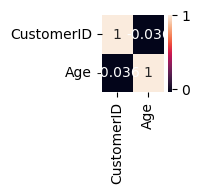

In [30]:
plt.figure(figsize=(1,1))
sns.heatmap(data.corr(numeric_only = True), annot=True)
plt.show()

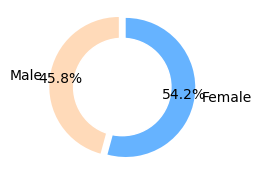

In [31]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(2,2)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

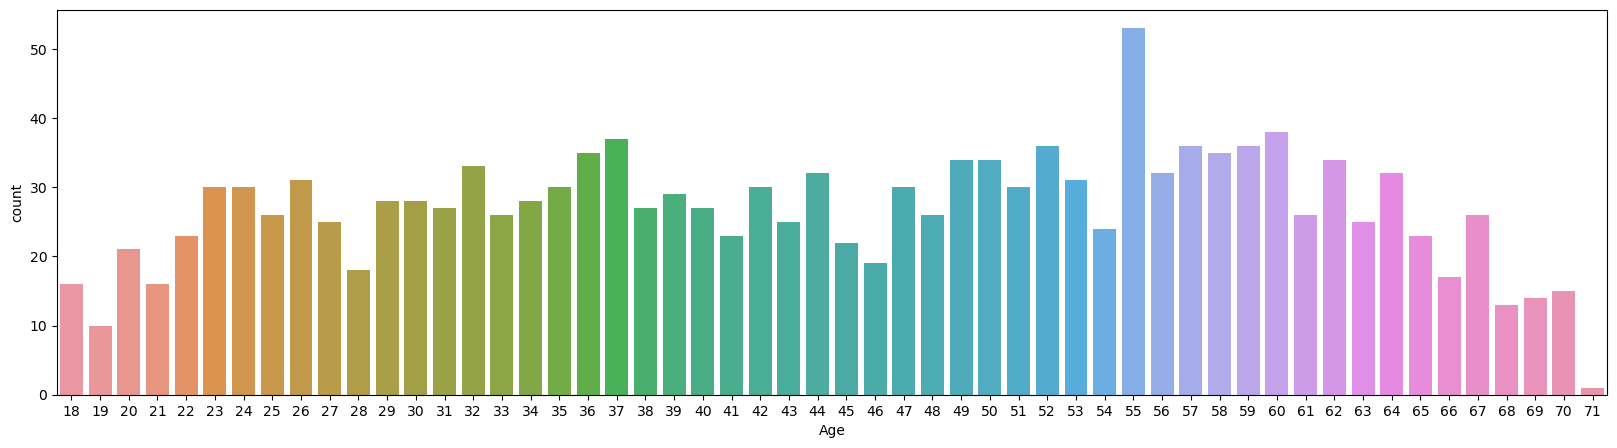

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(x=data.Age)
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

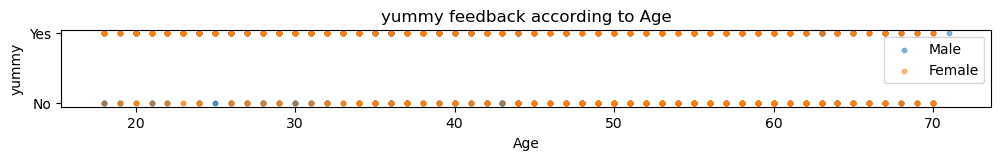

In [33]:
plt.figure(figsize=(12,1))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='yummy', data=data[data['Gender']==i],s = 10 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("yummy")
plt.title("yummy feedback according to Age")
plt.show()

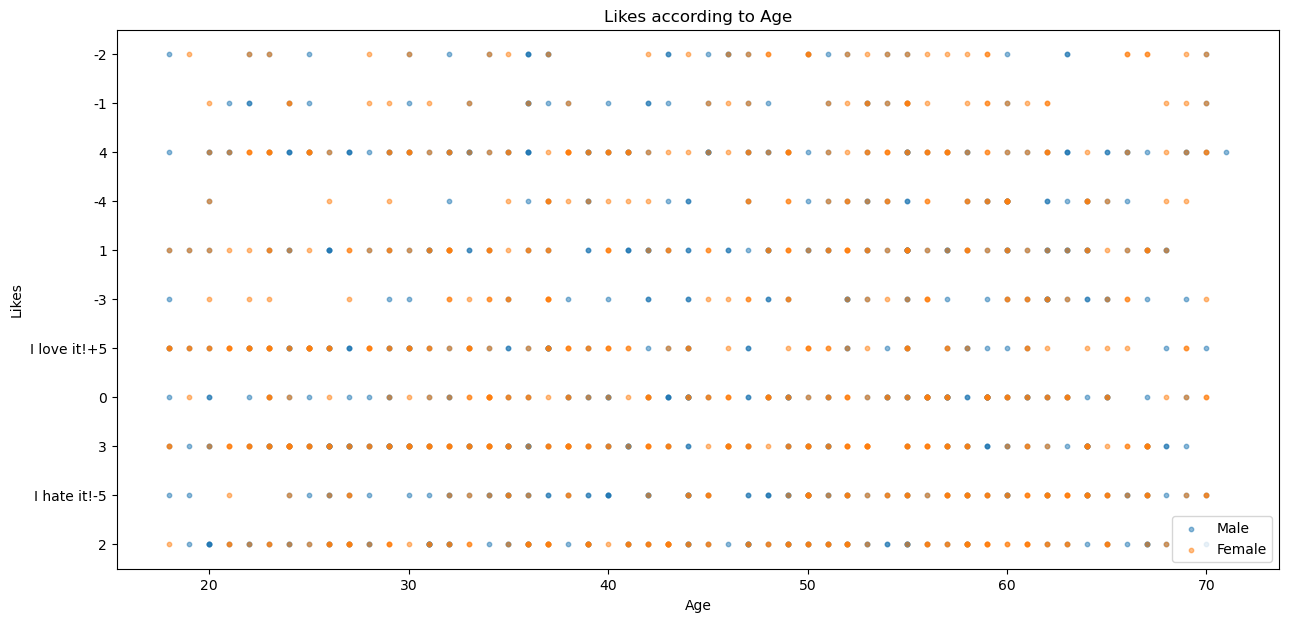

In [34]:
plt.figure(figsize=(15,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Like', data=data[data['Gender']==i],s = 10 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Likes")
plt.title("Likes according to Age")
plt.show()

Implement Clustering Algorithms

K-Means Clustering Algorithm

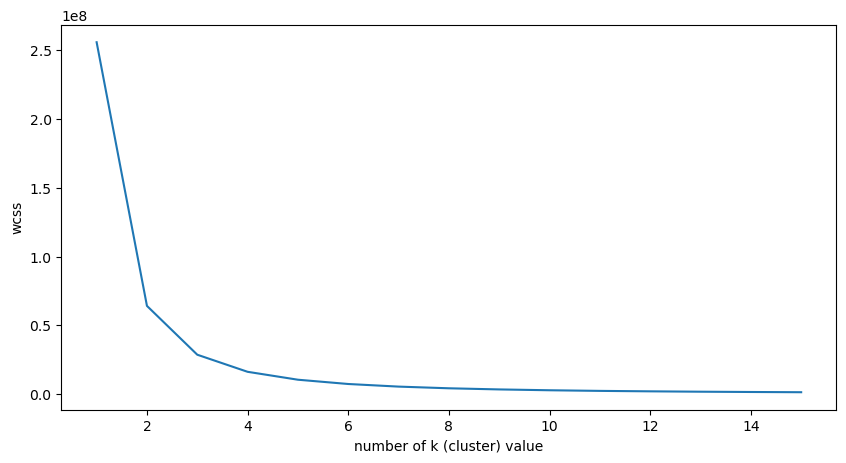

In [44]:
import warnings
warnings.filterwarnings("ignore")
wcss = []
data_model = data.drop(['Gender','yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Like','VisitFrequency'],axis=1)
for k in range(1,16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,16),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

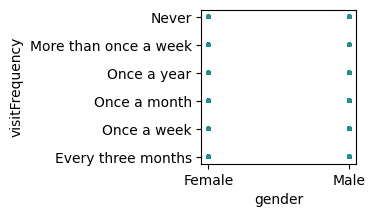

In [82]:
kmeans = KMeans(n_clusters=5)
data_predict = kmeans.fit_predict(data_model)

plt.figure(figsize=(2,2))
cols_list1 = data['Gender'].tolist()
cols_list2 = data['VisitFrequency'].tolist()
plt.scatter( x = cols_list1,y = cols_list2, data = data_model , c = data_predict , s = 5 )
plt.xlabel("gender")
plt.ylabel("visitFrequency")
plt.show()

Hierarchical Clustering Algorithm

Create demogram and find the best clustering value

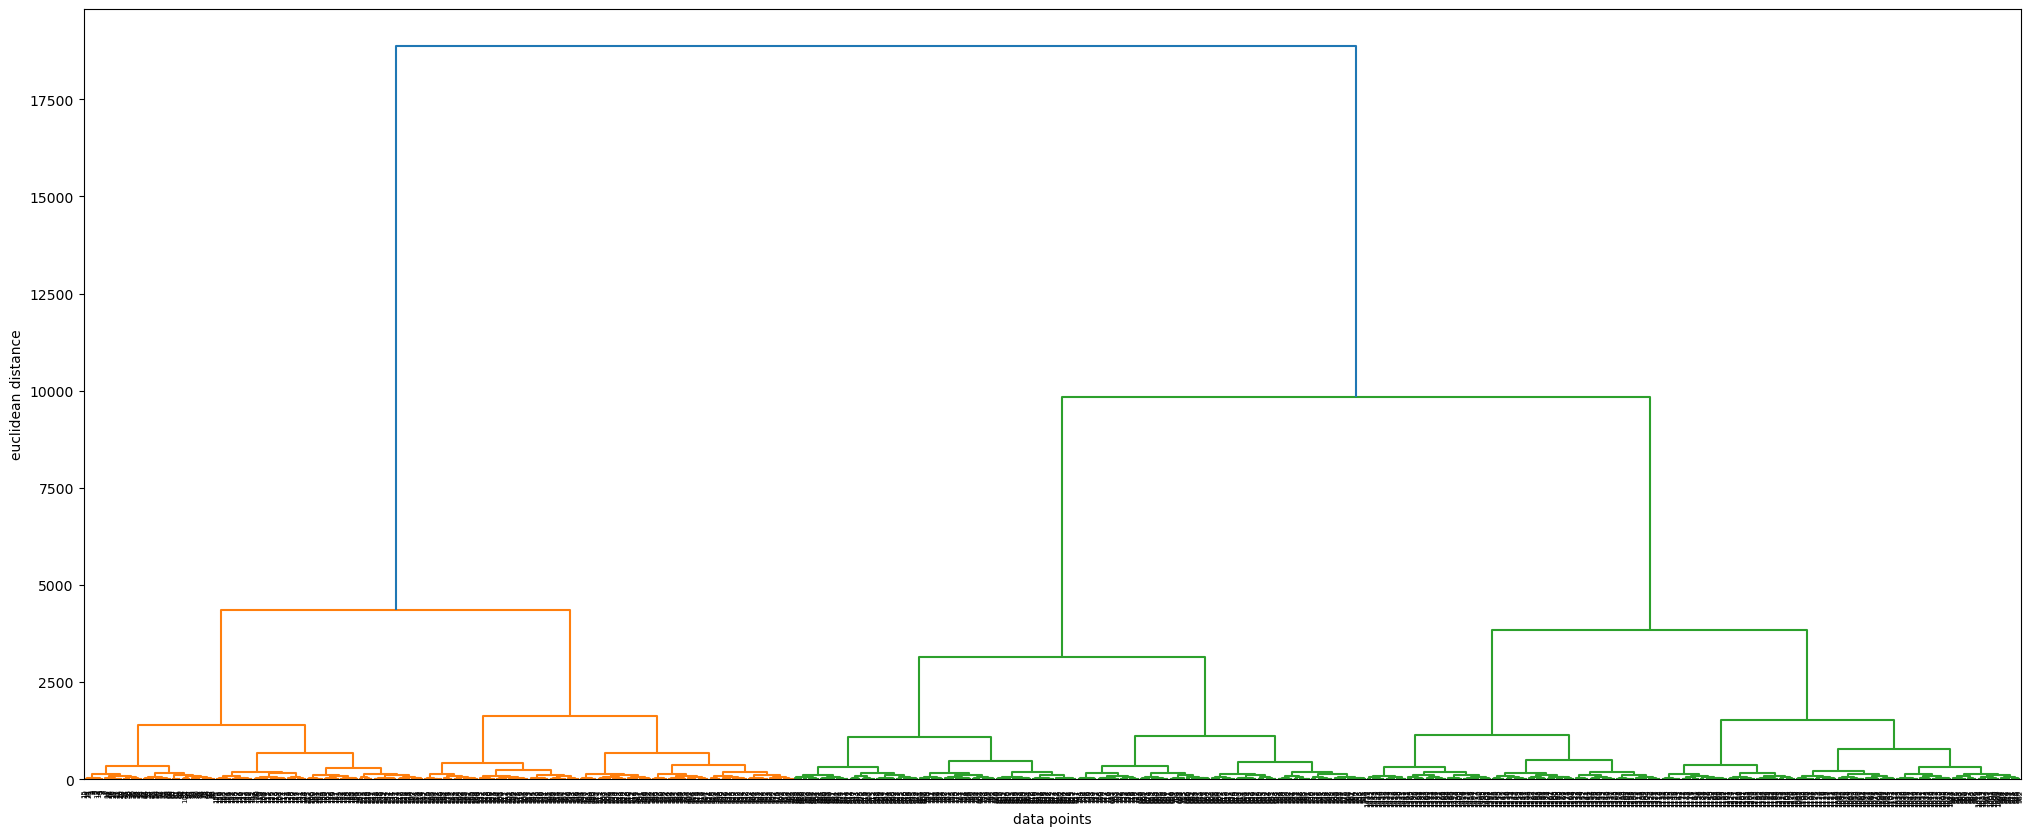

In [94]:
merg = linkage(data_model,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

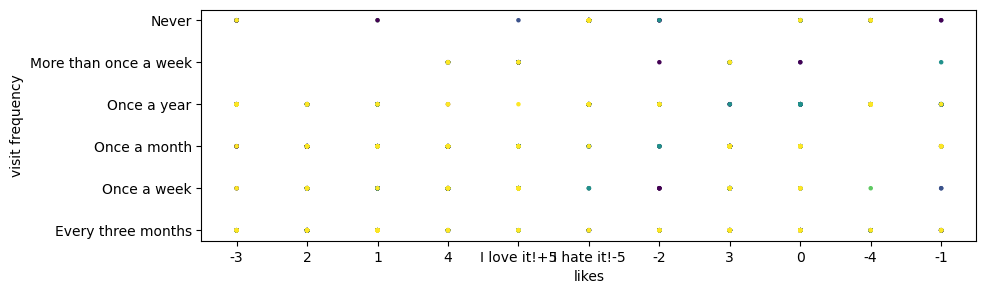

In [84]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 5,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(data_model)
plt.figure(figsize=(10,3))
cols_list1 = data['Like'].tolist()
cols_list2 = data['VisitFrequency'].tolist()
plt.scatter( x = cols_list1,y = cols_list2, data = data_model , c = data_predict , s = 5 )
plt.xlabel("likes")
plt.ylabel("visit frequency")
plt.show()